Prova Alexandre Lemos da Silva

Questão 1: criação do modelo de CNN 

In [ ]:
#importações para correto funcionamento da aplicação
import os
import cv2
import numpy as np
import keras as ke
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LeakyReLU

from sklearn.metrics import confusion_matrix
from skimage.transform import resize


Treinamento: X=(60000, 28, 28), y=(60000, 10)
Teste: X=(10000, 28, 28), y=(10000, 10)
Plotando exemplos


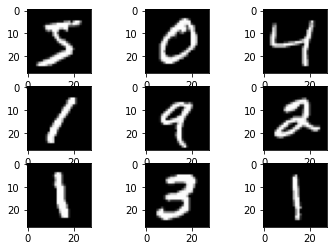

In [ ]:
# Carregamento dos dados de base MNIST: Digits classification dataset

mnist = ke.datasets.mnist   
(X_treino, Y_treino), (X_teste, Y_teste) = mnist.load_data()  # separação treino teste


# Normalização das entradas
X_teste= X_teste/255.0
X_treino = X_treino/255.0

#para particionar deu erro para inconsistência, código tentado:
#X_treino = X_treino[0:6000] /255.0
#X_treino = X_treino[6000:25000] /255.0

# codificacao da saída 
Y_treino=ke.utils.to_categorical(Y_treino)
Y_teste=ke.utils.to_categorical(Y_teste)


print('Treinamento: X=%s, y=%s' % (X_treino.shape, Y_treino.shape))
print('Teste: X=%s, y=%s' % (X_teste.shape, Y_teste.shape))

print("Plotando exemplos")
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(X_treino[i], cmap=plt.get_cmap('gray'))

plt.show()


In [ ]:

leaky_relu_alpha = 0.1
tf.random.set_seed(100)
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=(28, 28,))) # o flat é 28x28

leaky_relu_alpha = 0.1
model.add(LeakyReLU(alpha=leaky_relu_alpha))  #inclusão da leaky relu

model.add(ke.layers.Dense(5, activation='relu')) # função de ativação
model.add(LeakyReLU(alpha=leaky_relu_alpha))  #inclusão da leaky relu
model.add(ke.layers.Dense(10, activation='softmax')) # função de ativação
model.add(LeakyReLU(alpha=leaky_relu_alpha)) #inclusão da leaky relu

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x=X_treino, y=Y_treino,
          epochs=15, #máximo de épocas permitidas
          validation_data=(X_teste,Y_teste)) #validação

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7535 - accuracy: 0.7748 - val_loss: 0.4801 - val_accuracy: 0.8635
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4565 - accuracy: 0.8690 - val_loss: 0.4202 - val_accuracy: 0.8821
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4106 - accuracy: 0.8821 - val_loss: 0.3925 - val_accuracy: 0.8897
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3880 - accuracy: 0.8870 - val_loss: 0.3808 - val_accuracy: 0.8884
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8917 - val_loss: 0.3686 - val_accuracy: 0.8961
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3672 - accuracy: 0.8944 - val_loss: 0.3673 - val_accuracy: 0.8930
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3617 - accuracy: 0.8957 - val_loss: 0.3588 - val_accuracy:

313/313 [==============================] - 0s 1ms/step
1.1) Plote curvas de acurácia e da loss  para demonstrar o desempenho do modelo. Discuta os resultados 

Para estea aplicação, podemos observar que uma queda do valor de loss, isso é, deixamos de perder informações não identificadas, mantendo sua tendência de queda no treinamento e validação 

Valor de acurácia máxima: 0.9036

Valor de perda mínica máxima: 0.3307

1.2)  Plote a matriz de confusão contendo os resultados da predição do modelo; Discuta os resultados

A diagonal principal, representando os valores corretamente preditos, nos dão uma boa sinalização de categoria prevista versus categoria real. Nesse sentido, ao usar heatmap, se torna ainda mais clara como os resultados


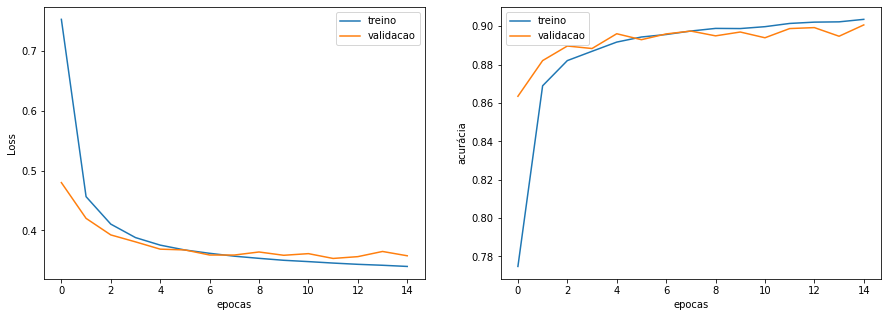

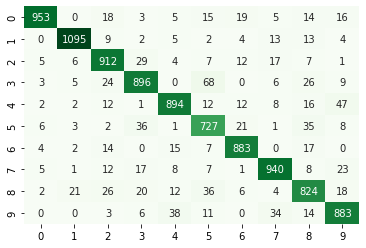

In [ ]:
# análise dos resultados

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

Y_pred_prob= model.predict(X_teste)
Y_pred_teste = np.argmax(Y_pred_prob,axis=1)  # resultado numerico
Y_teste_num= np.argmax(Y_teste,axis=1)   # retorna para numerico (era categorico)


print("1.1) Plote curvas de acurácia e da loss  para demonstrar o desempenho do modelo. Discuta os resultados \n")
print("Para estea aplicação, podemos observar que uma queda do valor de loss, isso é, deixamos de perder informações não identificadas, mantendo sua tendência de queda no treinamento e validação ")
print("\nValor de acurácia máxima: 0.9036\n")
print("Valor de perda mínica máxima: 0.3307\n")


cmat=confusion_matrix(Y_pred_teste,Y_teste_num)
cm_df = pd.DataFrame(cmat) 


plt.figure()

print("1.2)  Plote a matriz de confusão contendo os resultados da predição do modelo; Discuta os resultados\n")
print("A diagonal principal, representando os valores corretamente preditos, nos dão uma boa sinalização de categoria prevista versus categoria real. Nesse sentido, ao usar heatmap, se torna ainda mais clara como os resultados")


ax= plt.subplot()
sns.heatmap(cm_df,annot=True, cmap='Greens',fmt="d",cbar=False)


Questão 2: Rede pré-treinada para a classificação dos dados

In [ ]:
X_treino3=np.array([np.stack((resize(X_treino[i],(32,32)),)*3, axis=-1) for i in range(0,len(X_treino))])
X_teste3=np.array([np.stack((resize(X_teste[i],(32,32)),)*3, axis=-1) for i in range(0,len(X_teste))])

In [ ]:
#verificando propriedades
np.shape(X_treino3)

(60000, 32, 32, 3)

In [ ]:
#extraindo features
model_extract = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(32,32,3))

features_treino = model_extract.predict(X_treino3)
features_teste = model_extract.predict(X_teste3)

313/313 [==============================] - 150s 479ms/step


In [ ]:
#verificando novas propriedades
np.shape(features_treino)

(60000, 1, 1, 512)

In [ ]:
model = ke.Sequential()
model.add(ke.layers.Flatten(input_shape=np.shape(features_treino[0]))) #pode-se colocar (1,1,512)
model.add(ke.layers.Dense(5, activation='relu'))# 5 é o númro de neurônios, relu função de ativação
model.add(ke.layers.Dense(10, activation='softmax'))# 10 é o númro de neurônios, softmax função de ativação

model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(x=features_treino, y=Y_treino,
          epochs=15,
          validation_data=(features_teste,Y_teste))  # o que está entrando é o que saiu da rede pré-treinada

Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5920 - accuracy: 0.4240 - val_loss: 1.1956 - val_accuracy: 0.6026
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0472 - accuracy: 0.6595 - val_loss: 0.9376 - val_accuracy: 0.7091
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8695 - accuracy: 0.7292 - val_loss: 0.8117 - val_accuracy: 0.7448
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7782 - accuracy: 0.7532 - val_loss: 0.7511 - val_accuracy: 0.7595
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7248 - accuracy: 0.7638 - val_loss: 0.7074 - val_accuracy: 0.7625
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6909 - accuracy: 0.7698 - val_loss: 0.6826 - val_accuracy: 0.7708
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6662 - accuracy: 0.7740 - val_loss: 0.6687 - val_accuracy:

313/313 [==============================] - 1s 2ms/step


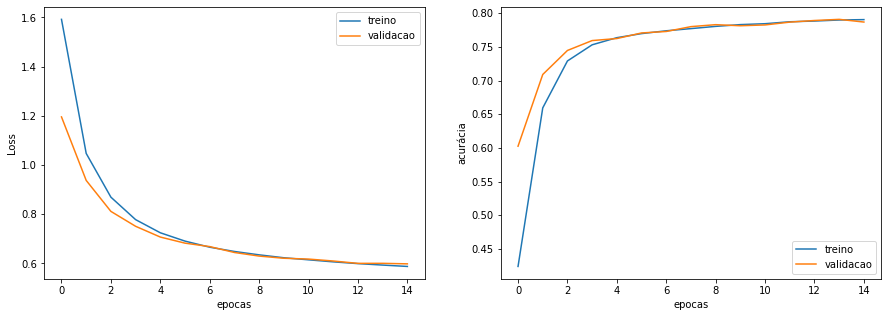

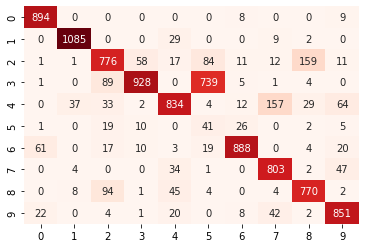

In [ ]:
# análise dos resultados

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="treino")
plt.plot(history.history["val_loss"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="treino")
plt.plot(history.history["val_accuracy"], label="validacao")
plt.xlabel("epocas")
plt.ylabel("acurácia")
plt.legend();

Y_pred_prob= model.predict(features_teste)
Y_pred_teste = np.argmax(Y_pred_prob,axis=1)  # resultado numerico
Y_teste_num= np.argmax(Y_teste,axis=1)   # retorna para numerico (era categorico)

cmat=confusion_matrix(Y_pred_teste,Y_teste_num)
cm_df = pd.DataFrame(cmat) 

plt.figure()
ax= plt.subplot()
sns.heatmap(cm_df,annot=True, cmap='Reds',fmt="d",cbar=False)

2.1) Plote curvas de acurácia e da loss  para demonstrar o desempenho do modelo. Discuta os resultados 

Para estea aplicação, podemos observar que uma queda do valor de loss, isso é, deixamos de perder informações não identificadas, mantendo sua tendência de queda no treinamento e validação 

Valor de acurácia máxima: 0.7870

Valor de perda mínica máxima: 0.5880

1.2)  Plote a matriz de confusão contendo os resultados da predição do modelo; Discuta os resultados

A diagonal principal, representando os valores corretamente preditos, nos dão uma boa sinalização de categoria prevista versus categoria real. Nesse sentido, ao usar heatmap, se torna ainda mais clara como os resultados. Contudo, está errada, principalmente para a classificação 5.
